# Instructions

## Section A
A dataset that comprises product reviews aggregated from the abillion app has been provided. Use this dataset to conduct an analysis (with appropriate data visualisation), and generate insights for abillion's product and/or business teams. You are encouraged to generate features from unstructured text data, and/or use external data sources to augment your analysis.

Submission:
1. 2-3 interesting observations with appropriate visualisations
2. All codes used for data analysis and visualisation

### Install some dependency

In [ ]:
! pip install pandas_profiling;  #for profiling report
! pip install streamlit;   #for future app builidng
! pip install textblob;   #for sentiment polarizing

### Import review dataset and have sample data and description

In [89]:
# Reviews dataset
import pandas as pd

#read csv file into Pandas dataframe
# There are lot of latin characters so supported encoding type is mentioned
df = pd.read_csv('assessment_dataset.csv',encoding='latin')
df

,reviewText,reviewBrand,brandCategory,country,reviewDate,likesCount,commentsCount
0,Margarina vegetal para preparar todo tipo de c...,4018,food,Argentina,2021-01-20 06:12:16.975,2.0,0
1,No sÃ© si es la mÃ¡s cremosa pero estÃ¡ rica. ...,4568,food,Argentina,2021-02-25 16:12:00.830,15.0,0
2,Really tasty crackers! Oven baked but with onl...,3485,food,South Africa,2021-03-03 10:56:34.895,2.0,0
3,"Es una salsa mÃ¡s salada que picante, pero el ...",2290,food,Mexico,2021-03-04 22:19:59.747,0.0,0
4,a couple of these biscuits proves 3 gram prote...,234,food,NaN,2021-01-11 17:47:20.337,1.0,0
...,...,...,...,...,...,...,...
4995,Love trying new things... and this one was qui...,584,food,Ireland,2021-01-01 16:53:59.643,28.0,1
4996,Organic coconut shower soap bar ð§¼ This set ...,8173,health and beauty,Germany,2021-01-27 06:20:10.973,24.0,0
4997,Me encantÃ³ pero me cayÃ³ pesada. El olor es i...,49,food,Argentina,2021-02-24 17:28:44.142,0.0,0
4998,This was nice! \nThe chocolate couverture was ...,4943,food,Canada,2021-02-12 16:32:59.934,12.0,2


In [90]:
df.describe()

,reviewBrand,likesCount,commentsCount
count,5000.0000,5000.000000,5000.000000
mean,3744.6664,5.334600,0.368600
std,4335.7634,8.330674,1.453257
min,1.0000,0.000000,0.000000
25%,537.0000,1.000000,0.000000
50%,1817.0000,3.000000,0.000000
75%,5411.2500,6.000000,0.000000
max,16987.0000,121.000000,38.000000


In [201]:
from pandas_profiling import ProfileReport

#Create profiling of entire dataset
profile = ProfileReport(reviews, title="Reviews Profiling Report")

#Visualize report generated
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:03<00:00,  3.22s/it]


### Prepare some hypothesis and validate using dataset to test
1. **hypothesis1** = "The number of likes and comments on reviews is higher for certain brands and categories"
2. **hypothesis2** = "The sentiment of the reviews is positive for most brands and categories"

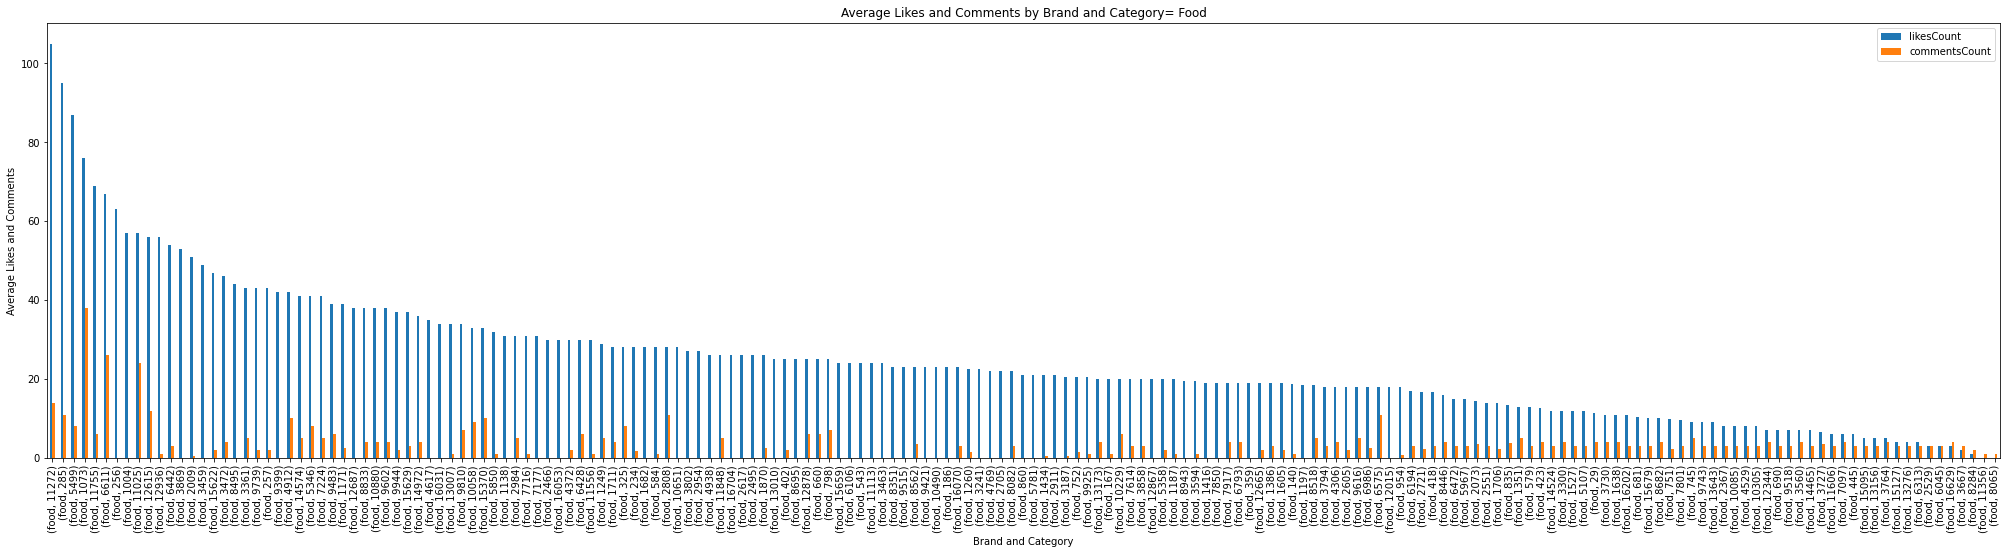

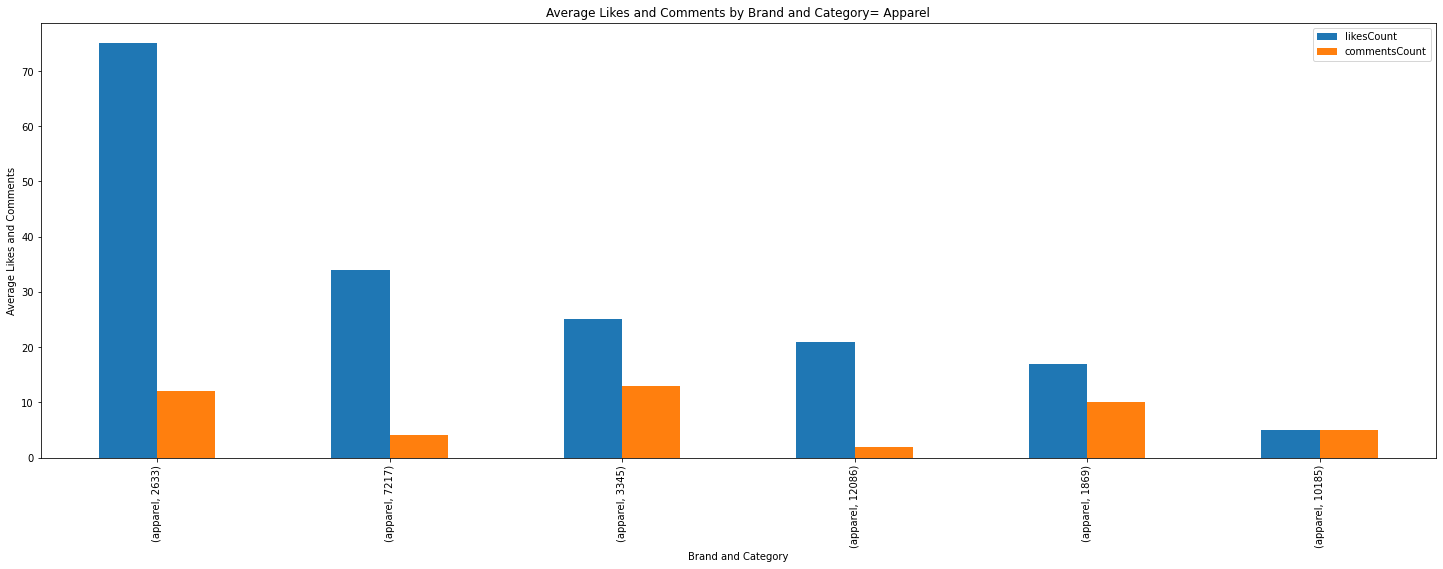

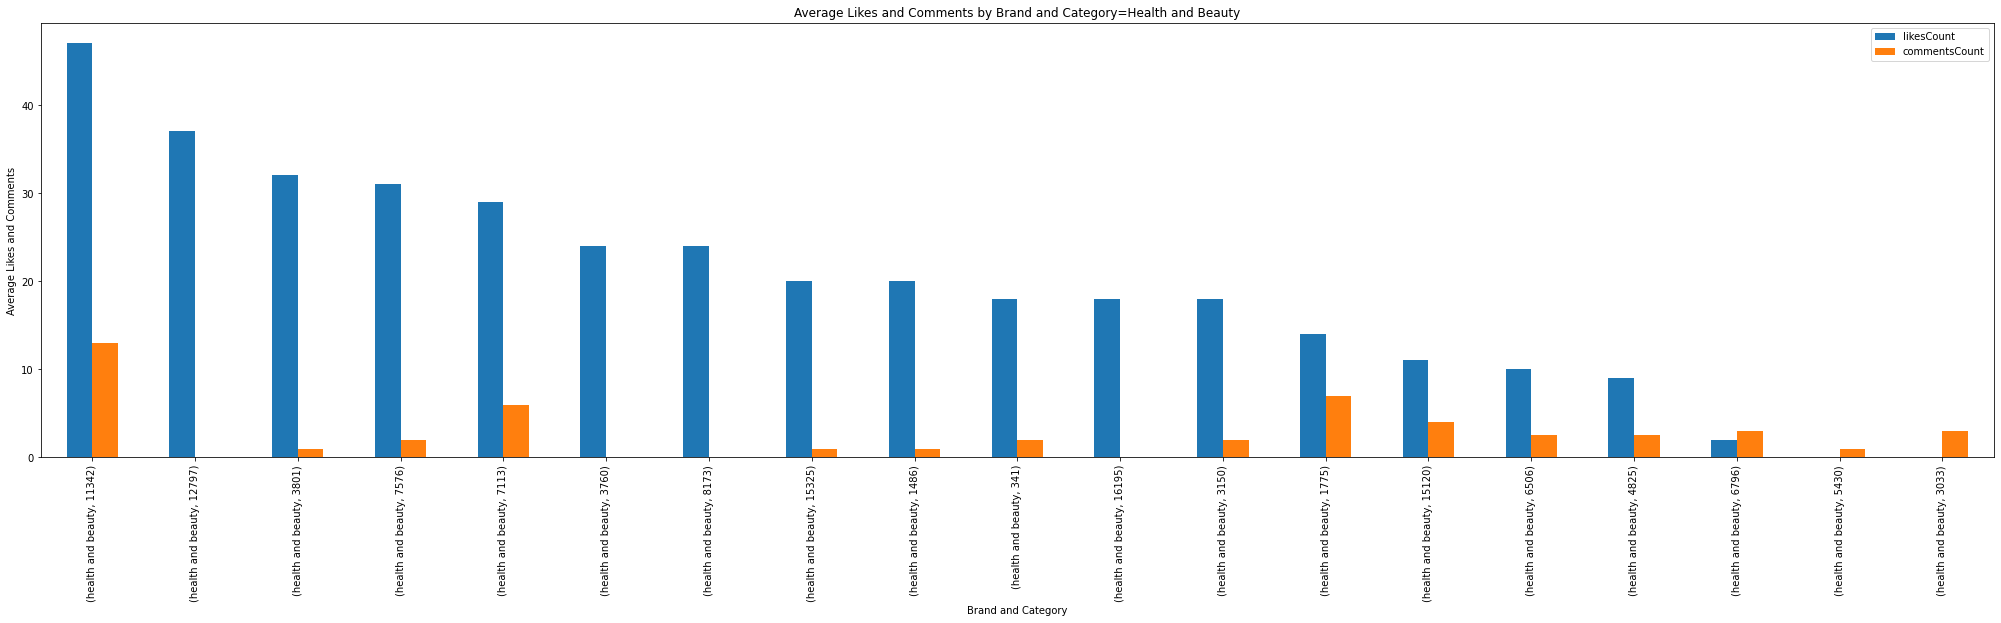

In [133]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Test the first hypothesis
# Group the DataFrame by brand and category and calculate the mean number of likes and comments
df_grouped = df.groupby(['brandCategory','reviewBrand'])[['likesCount', 'commentsCount']].mean()

df_grouped_food = df_grouped[df_grouped.index.get_level_values(0)=='food']
df_grouped_aparrel = df_grouped[df_grouped.index.get_level_values(0)=='apparel']
df_grouped_hnbeauty = df_grouped[df_grouped.index.get_level_values(0)=='health and beauty']

# Visualize the results using a bar chart
df_grouped_food.loc[lambda x: ((x['likesCount']>17.0) | (x['commentsCount']>2.0) | (x['commentsCount']>x['likesCount']))].sort_values(by='likesCount',ascending=False).plot(kind='bar', figsize=(35, 8))
plt.xlabel('Brand and Category')
plt.ylabel('Average Likes and Comments')
plt.title('Average Likes and Comments by Brand and Category= Food')

df_grouped_aparrel.loc[lambda x: ((x['likesCount']>17.0) | (x['commentsCount']>2.0) | (x['commentsCount']>x['likesCount'])) ].sort_values(by='likesCount',ascending=False).plot(kind='bar', figsize=(25, 8))
plt.xlabel('Brand and Category')
plt.ylabel('Average Likes and Comments')
plt.title('Average Likes and Comments by Brand and Category= Apparel')

df_grouped_hnbeauty.loc[lambda x: ((x['likesCount']>17.0) | (x['commentsCount']>2.0) | (x['commentsCount']>x['likesCount'])) ].sort_values(by='likesCount',ascending=False).plot(kind='bar', figsize=(35, 8))
plt.xlabel('Brand and Category')
plt.ylabel('Average Likes and Comments')
plt.title('Average Likes and Comments by Brand and Category=Health and Beauty')

plt.show()


We've visualized only higher Likes or Comment brands in each categories. We've put cutout with average **Likes > 17.0**, and **Comments > 2.0** and anywhere if **comments are more than likes.**<br>
What we observed above are :
1. Some brands have more Likes and Comments in general, Means more interactive
2. Some brands disproportionate likes vs Comments, More likes means more outreach but not interesting to have comments by reviewers.
3. Some brands have more comments than like, it reflect very interactive and maybe very specific to some community , not much outreach since low likes and in general comments count are also on lower side for those cases.

Let's dive deeper into each Like and comment review , for each category and find out the spread as well as try to find out why we used 17 for likesCount and 2 for commentCount.

In [156]:
# Find average count across Categories
df.groupby(['brandCategory'])[['likesCount', 'commentsCount']].mean()

,likesCount,commentsCount
brandCategory,,
apparel,9.620690,1.655172
food,5.455137,0.375056
health and beauty,4.044834,0.239766


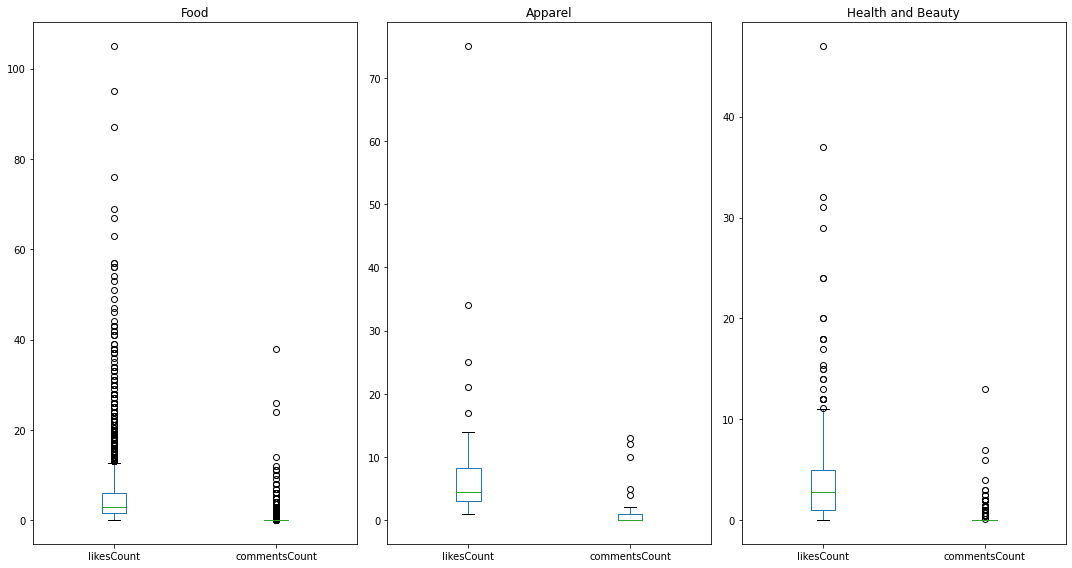

In [157]:
# plot BoxPlot for each Category for count spread
f, axs = plt.subplots(1,3,sharey=False, figsize=(15,8))
df_grouped.xs('food').plot(kind='box',ax=axs[0],title="Food")
df_grouped.xs('apparel').plot(kind='box',ax=axs[1],title="Apparel")
df_grouped.xs('health and beauty').plot(kind='box',ax=axs[2],title="Health and Beauty")
plt.tight_layout()

<AxesSubplot:>

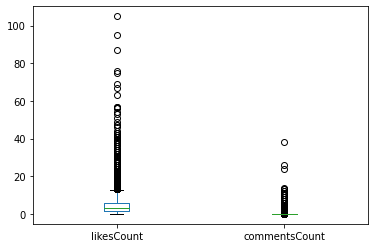

In [71]:
#overall spread
df_grouped.plot(kind='box')

Here we are adding 2 new features derived from Likes and Comment Count.
1. Sum of likes abd Comments for each brand, use to determine total exchange for brand
2. Ratio of Comment to Like for each brand, use to inform about ratio between comments to likes to identify different types of brand engagement

In [164]:
#prepared dataframe as per hypothesis 1 
df_hypo1=df.groupby(['reviewBrand', 'brandCategory']).filter(lambda x: x['likesCount'].mean() > 17 or x['commentsCount'].mean() > 2) 
df_grouped_hypo1 = df_hypo1.groupby(['brandCategory','reviewBrand'])['likesCount', 'commentsCount'].mean()

df_grouped_hypo1['likePcount'] = df_grouped_hypo1.likesCount +df_grouped_hypo1.commentsCount 
df_grouped_hypo1['likeCountRatio'] = df_grouped_hypo1.commentsCount/df_grouped_hypo1.likesCount 

df_grouped_hypo1

likesCount  commentsCount  likePcount  \
brandCategory     reviewBrand                                          
apparel           1869               17.0           10.0        27.0   
                  2633               75.0           12.0        87.0   
                  3345               25.0           13.0        38.0   
                  7217               34.0            4.0        38.0   
                  10185               5.0            5.0        10.0   
...                                   ...            ...         ...   
health and beauty 11342              47.0           13.0        60.0   
                  12797              37.0            0.0        37.0   
                  15120              11.0            4.0        15.0   
                  15325              20.0            1.0        21.0   
                  16195              18.0            0.0        18.0   

                               likeCountRatio  
brandCategory     reviewBrand                  
apparel           1869               0.588235  
                  2633               0.160000  
                  3345               0.520000  
                  7217               0.117647  
                  10185              1.000000  
...                                       ...  
health and beauty 11342              0.276596  
                  12797              0.000000  
                  15120              0.363636  
                  15325              0.050000  
                  16195              0.000000  

[202 rows x 4 columns]

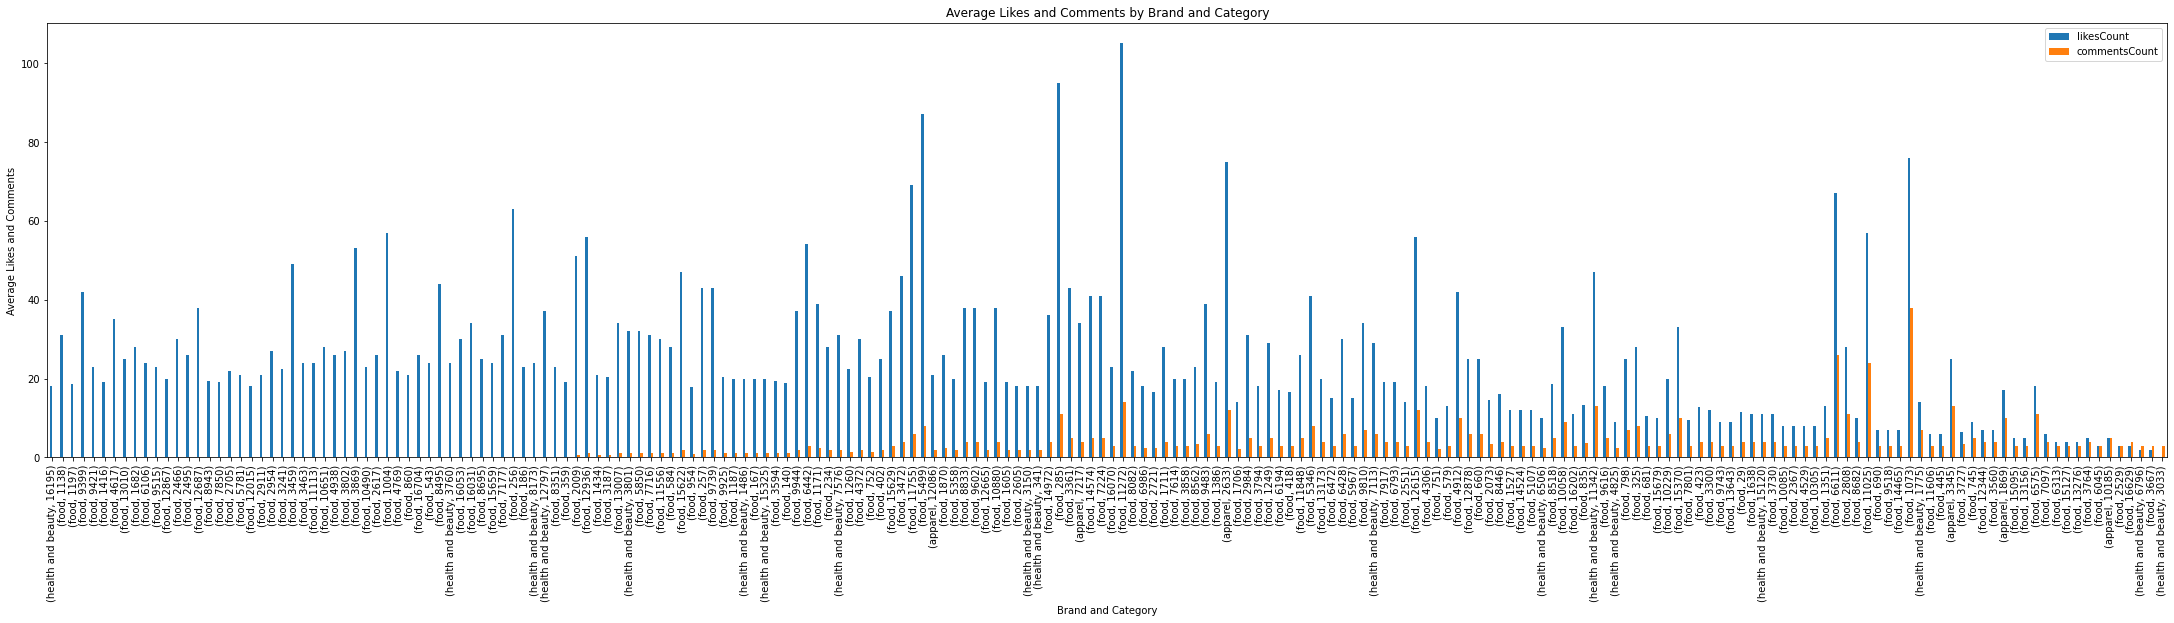

In [165]:
# Visualize the results using a bar chart
df_grouped_hypo1.sort_values(by='likeCountRatio',ascending=True)[['likesCount','commentsCount']].plot(kind='bar', figsize=(38, 8))
plt.xlabel('Brand and Category')
plt.ylabel('Average Likes and Comments')
plt.title('Average Likes and Comments by Brand and Category')
plt.show()

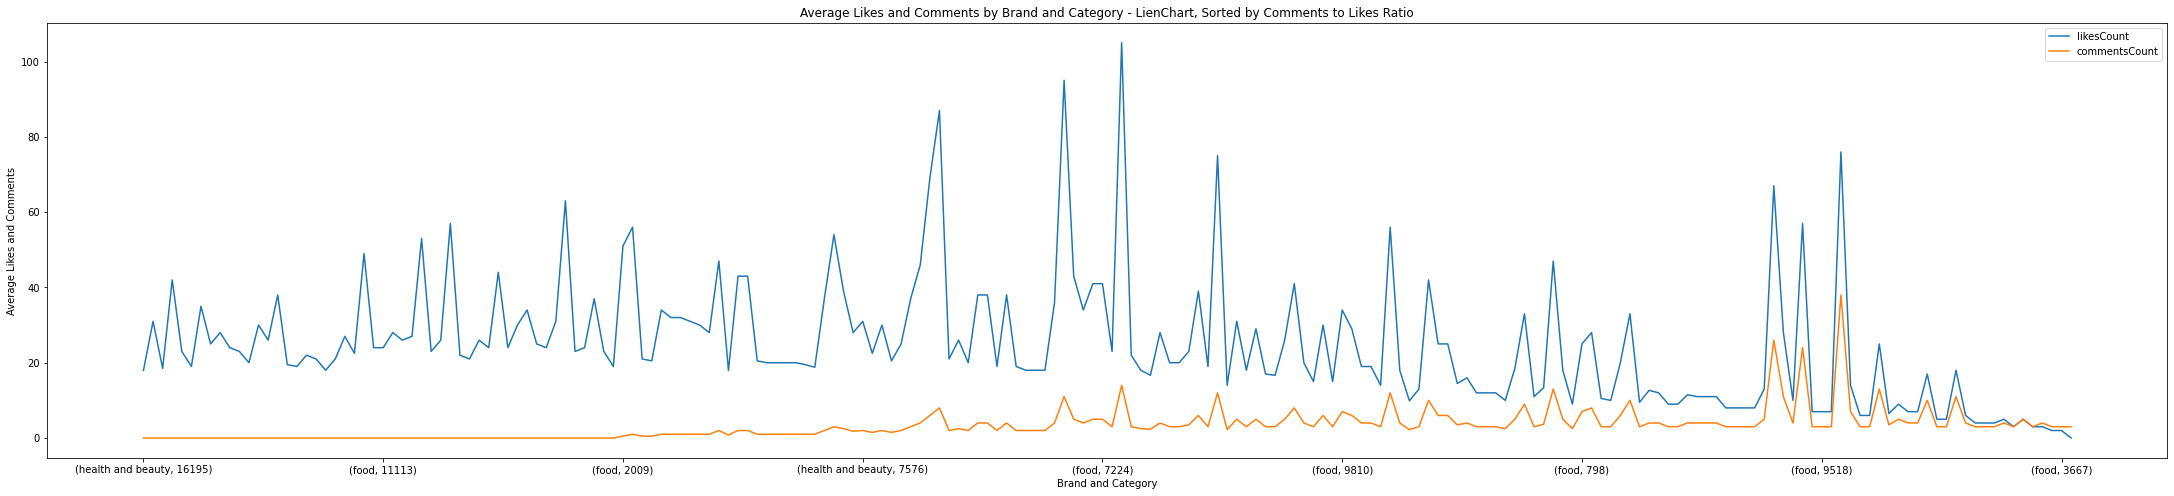

In [167]:
# Visualize the results using a Line chart
df_grouped_hypo1.sort_values(by='likeCountRatio',ascending=True)[['likesCount','commentsCount']].plot(kind='line', figsize=(38, 8))
plt.xlabel('Brand and Category')
plt.ylabel('Average Likes and Comments')
plt.title('Average Likes and Comments by Brand and Category - LienChart, Sorted by Comments to Likes Ratio')
plt.show()

In Above we have displayed on left with more likes and less comments , towards to right where it transition to more coments compare to likes, In middle it's more brands who have good comments to likes ratio, so equal engagement. Left and right ends are skewed.

### Second Hypothesis

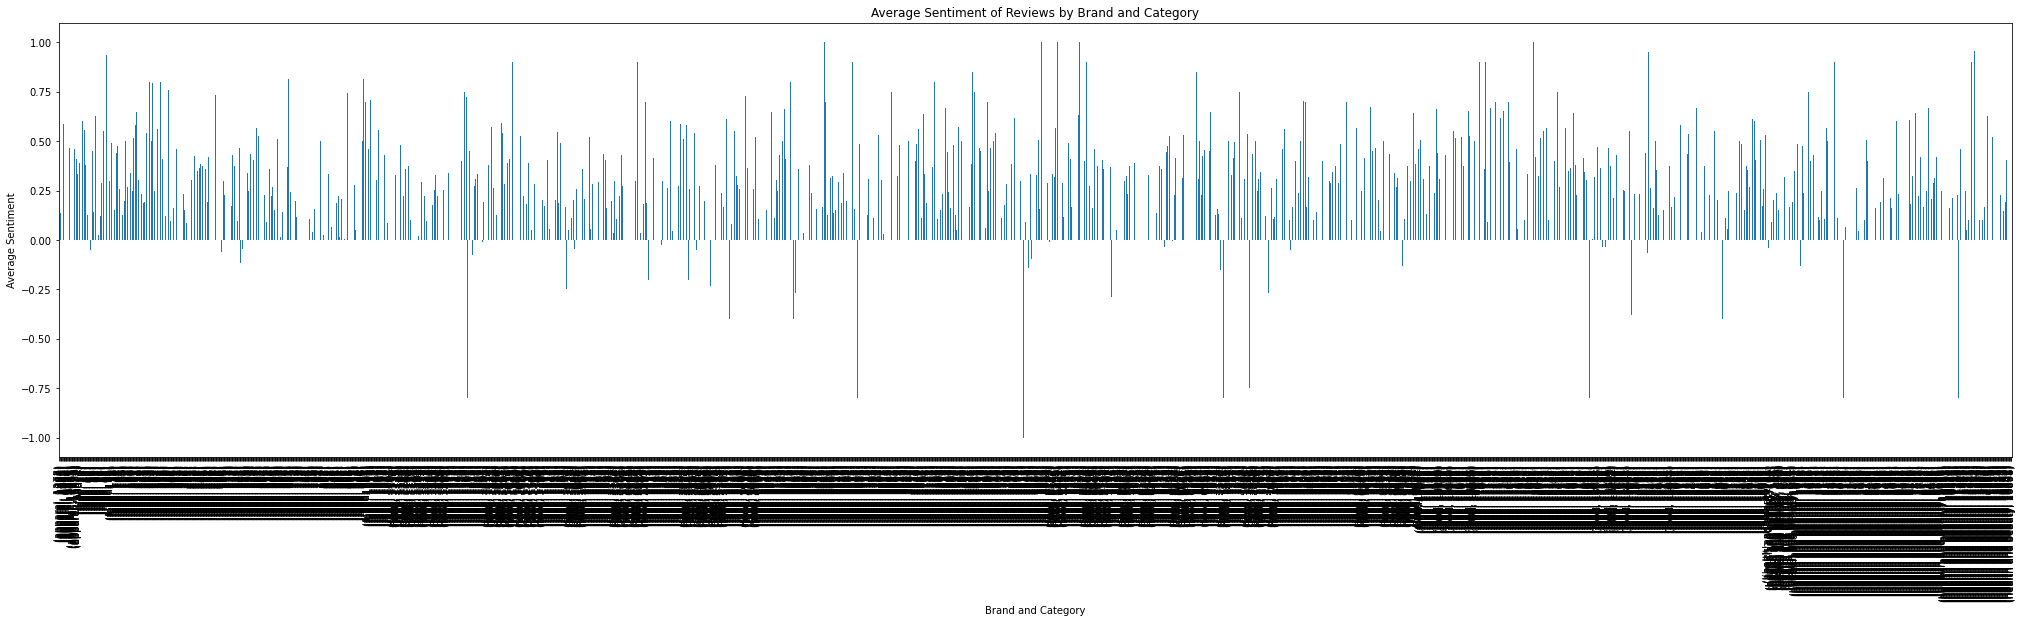

In [168]:
# Test the second hypothesis
# Import the textblob library for sentiment analysis
from textblob import TextBlob

# Create a new column in the DataFrame to store the sentiment of each review
df['review_sentiment'] = df['reviewText'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Group the DataFrame by brand and category and calculate the mean sentiment of the reviews
df_grouped_hypo2 = df.groupby([ 'brandCategory','reviewBrand'])['review_sentiment'].mean()

# Visualize the results using a bar chart
df_grouped_hypo2.plot(kind='bar', figsize=(35, 8))
plt.xlabel('Brand and Category')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment of Reviews by Brand and Category')
plt.show()

Here We can see there are some Positive sentiments and some brands have towards negative polarizing sentiments, dig more deeper to find more about those brands

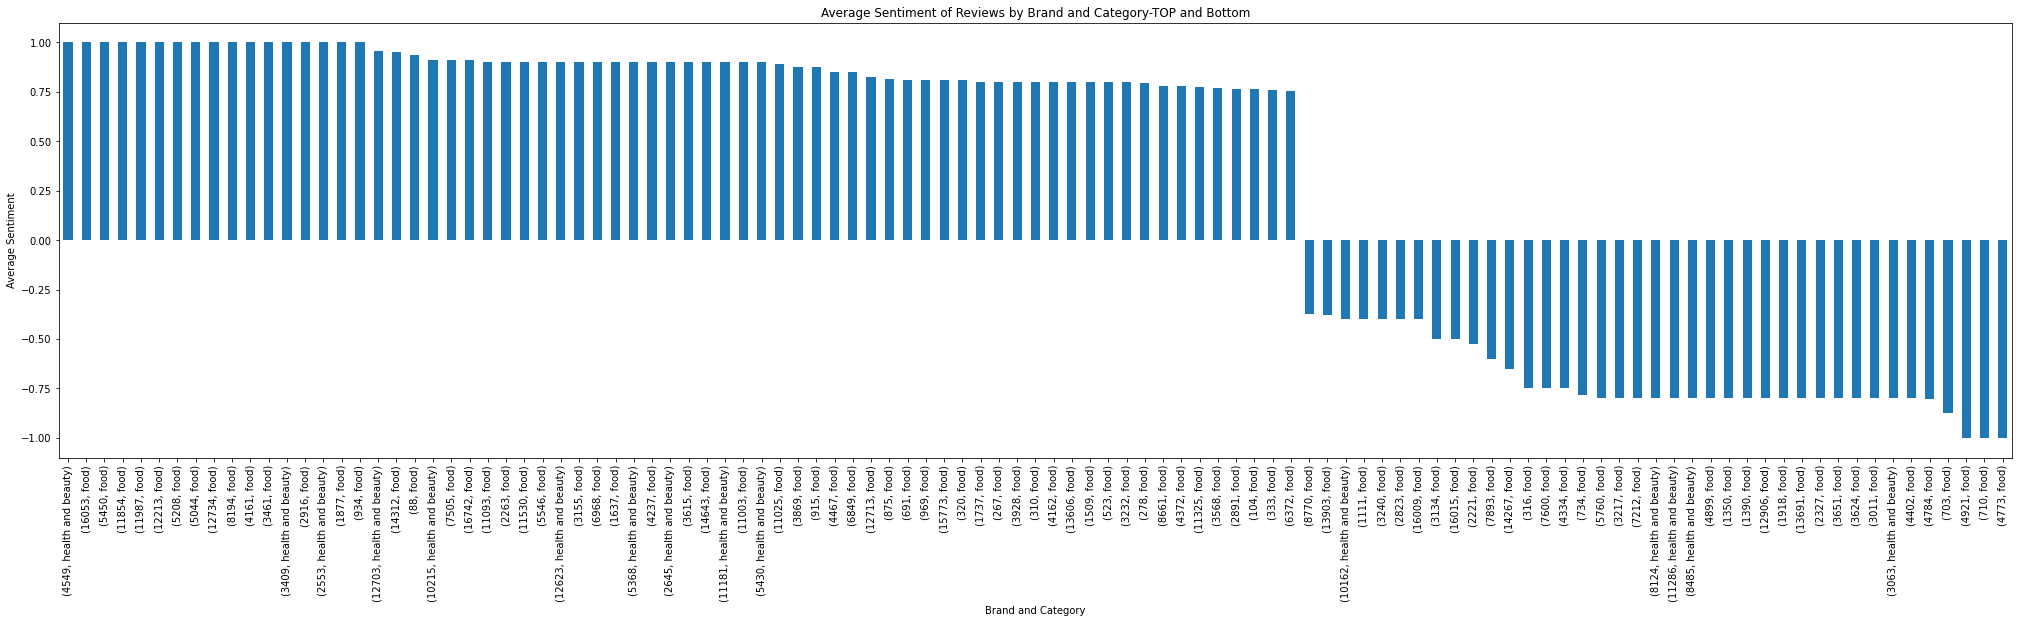

In [172]:
df_hypo2=df.groupby(['brandCategory','reviewBrand']).filter(lambda x: x['review_sentiment'].mean() > .75 or x['review_sentiment'].mean() < -.35) 
df_grouped_hypo2 = df_hypo2.groupby(['reviewBrand', 'brandCategory'])['review_sentiment'].mean()

# Visualize the results using a bar chart
df_grouped_hypo2.sort_values(ascending=False).plot(kind='bar', figsize=(35, 8))
plt.xlabel('Brand and Category')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment of Reviews by Brand and Category-TOP and Bottom')
plt.show()

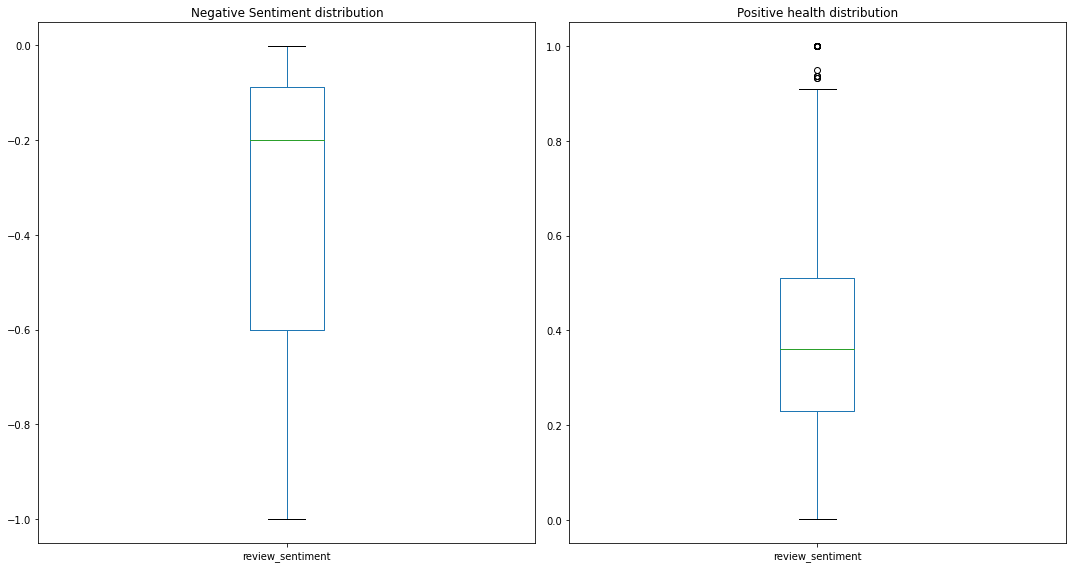

In [184]:
# plot BoxPlot for Positve and Negative Sentiment towards brand overall
f, axs = plt.subplots(1,2,sharey=False, figsize=(15,8))
df[df.review_sentiment<0]['review_sentiment'].plot(kind='box',ax=axs[0],title="Negative Sentiment distribution")
df[df.review_sentiment>0]['review_sentiment'].plot(kind='box',ax=axs[1],title="Positive health distribution")
#df_grouped.xs('health and beauty').plot(kind='box',ax=axs[2],title="Health and Beauty")
plt.tight_layout()

In [35]:
df['review_sentiment'].describe()

count    5000.000000
mean        0.188683
std         0.281270
min        -1.000000
25%         0.000000
50%         0.061932
75%         0.375000
max         1.000000
Name: review_sentiment, dtype: float64

In [185]:
df.dtypes

reviewText           object
reviewBrand           int64
brandCategory        object
country              object
reviewDate           object
likesCount          float64
commentsCount         int64
review_sentiment    float64
dtype: object

### scatter plot showing the relationship between the number of likes and comments for a given brand and category.

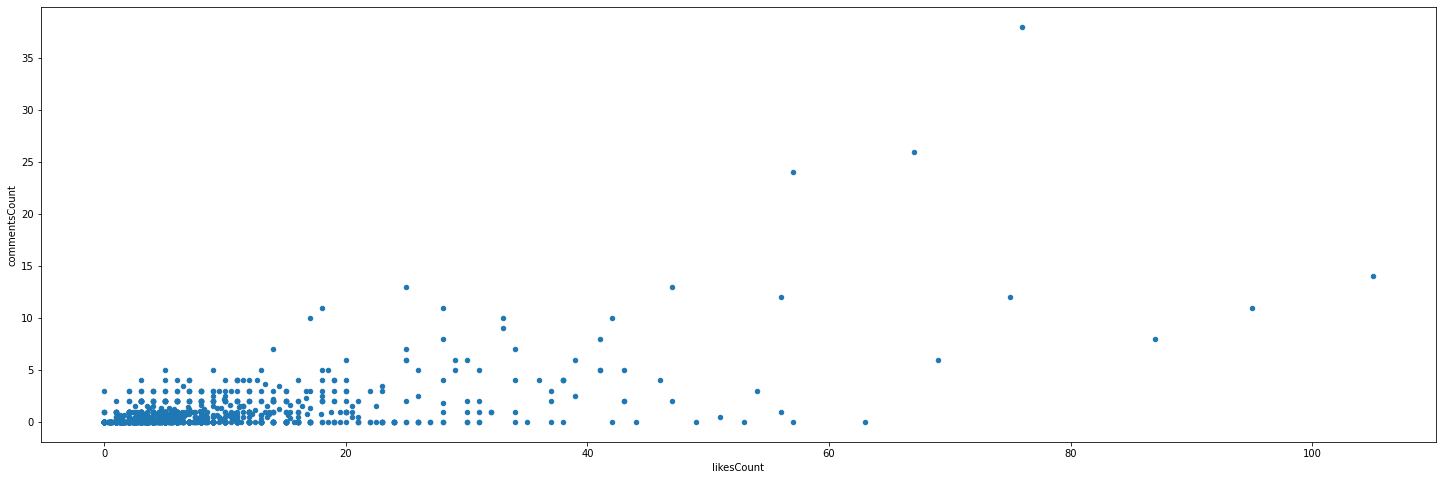

In [200]:
# create a pivot table to analyze the data
pivot = df.pivot_table(index=['brandCategory','reviewBrand'], values=['likesCount', 'commentsCount'], aggfunc='mean')

colors = {'book':'tab:blue', 'apparel':'tab:orange', 'health and beauty':'tab:green'}

# plot the results
pivot.plot(kind='scatter',x='likesCount',y='commentsCount', figsize=(25, 8))
plt.show()

In [202]:
pivot = df.pivot_table(index=['brandCategory','reviewBrand'], values=['likesCount', 'commentsCount'], aggfunc='mean')

# Filter the dataframe based on the selected values
filtered_data = pivot[
    (pivot["likesCount"] >= 10) &
    (pivot["likesCount"] <= 50) &
    (pivot["commentsCount"] >= 5) &
    (pivot["commentsCount"] <= 30)
]

filtered_data

commentsCount  likesCount
brandCategory     reviewBrand                           
apparel           1869                  10.0        17.0
                  3345                  13.0        25.0
food              325                    8.0        28.0
                  660                    6.0        25.0
                  798                    7.0        25.0
                  1249                   5.0        29.0
                  1351                   5.0        13.0
                  2808                  11.0        28.0
                  2984                   5.0        31.0
                  3361                   5.0        43.0
                  4912                  10.0        42.0
                  5346                   8.0        41.0
                  6428                   6.0        30.0
                  6575                  11.0        18.0
                  7224                   5.0        41.0
                  8518                   5.0        18.5
                  9483                   6.0        39.0
                  9616                   5.0        18.0
                  9810                   7.0        34.0
                  10058                  9.0        33.0
                  10229                  6.0        20.0
                  11848                  5.0        26.0
                  12878                  6.0        25.0
                  14574                  5.0        41.0
                  15370                 10.0        33.0
health and beauty 1775                   7.0        14.0
                  7113                   6.0        29.0
                  11342                 13.0        47.0

In [218]:
filtered_data.reset_index()
filtered_data

commentsCount  likesCount
brandCategory     reviewBrand                           
apparel           1869                  10.0        17.0
                  3345                  13.0        25.0
food              325                    8.0        28.0
                  660                    6.0        25.0
                  798                    7.0        25.0
                  1249                   5.0        29.0
                  1351                   5.0        13.0
                  2808                  11.0        28.0
                  2984                   5.0        31.0
                  3361                   5.0        43.0
                  4912                  10.0        42.0
                  5346                   8.0        41.0
                  6428                   6.0        30.0
                  6575                  11.0        18.0
                  7224                   5.0        41.0
                  8518                   5.0        18.5
                  9483                   6.0        39.0
                  9616                   5.0        18.0
                  9810                   7.0        34.0
                  10058                  9.0        33.0
                  10229                  6.0        20.0
                  11848                  5.0        26.0
                  12878                  6.0        25.0
                  14574                  5.0        41.0
                  15370                 10.0        33.0
health and beauty 1775                   7.0        14.0
                  7113                   6.0        29.0
                  11342                 13.0        47.0

# Section B

Given your experience on the app, what are some new features or feature enhancements (that involve data) you can think of? How might you go about implementing this feature?

**Answer**  
An interesting feature would be...

Few interesting features will be:
1. Rather than visualizing story based on latest in feed, It should be more personalised, could be based on multiple factors:  
    - **Likeness to previous exchanges**  
    Based on likeness we identify topic similar to posts which user show interest and give them rating score more than any other general score in order todisplay in feed.
    - **More likeness with other users of same group or community which people are liking**  
    Based on likeness with other users  we can identify topic(category or community) of users and whic posts are more trending or have more exchanges between users we can have higher rating for those posts in order to be shown on top compared to any other feed post.FileNotFoundError  
<br>
2. We need to restrict user content which need to be interact solely based on geoLocation, Since If user belong to Gelocation of Singapore , It doesn't make any sense to see posts from America or Eurpoe, Since user cannot access to those brands in general.
    - This could be done simply by fetching and ranking post for feed of uder with Gelocation boundary. In backend pipeline for creating feed of user will need to be modified to have extra filter based on Geolocation.  
<br>  

3. Brands who have more presence in multiple countries, only those feed from other countries should be made available to be seen into user Geolocation, since it will be engaging for user to purchase those brand products.
    - It could be simple analysis based on above dataset provided , we can identify brands in review in different countries.
    
4. Provide Map search feature to user  
    - Provide each feed of brand or store with GeoFeed so that , user can find stores nearby and easy to go there based on time availability.
